<h1><center> Plot simulation results: data03

<h4> Output file directory: `JuliaSEM/output/flux_sims/data__.out`

Plotting scripts: `JuliaSEM/scripts/plots.jl`, `JuliaSEM/scripts/earthquake-cycles.jl`

<h4> Simulation Description: </h4>
  

###### data03.out: 

    - Elastic halfspace 
    - Fault zone depth = 8km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 104 hrs, CPU time = 784 hrs 
    - cluster parameters: nodes=1:ppn=8, pmem=8gb
    
###### data05.out: 

    - Elastic halfspace 
    - Fault zone depth = 12km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 99 hrs 
    - cluster parameters: nodes=1:ppn=4, pmem=8gb

In [112]:
#include("output.jl")
# for now, construct results, parameters, setup

mutable struct results
    Stress::Array{Float64,2}
    SlipVel::Array{Float64,2}
    Slip::Array{Float64,2}
    time_::Array{Float64}
end

using Distributed
include("src/parameters/defaultParameters.jl")
include("src/setup.jl")

P = setParameters(12e3)
S = setup(P);

In [214]:
# deserialize the output
using Serialization
open("output/flux_sims/data03.out") do f
    global O, sim_time
    O = deserialize(f)
    sim_time = deserialize(f)
end

375157.454441196

<h3> Plot results

In [132]:
# Cumulative-slip plot
include("scripts/cumulative-slip.jl")
include("scripts/plots.jl")

cumSlipPlot (generic function with 1 method)

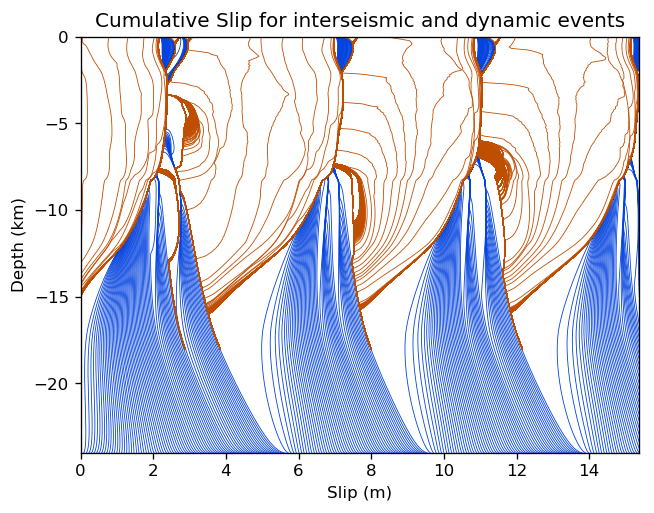

In [215]:
delfsec, delf5yr = cumSlip(O.Slip, O.SlipVel, O.time_)
cumSlipPlot(delfsec, delf5yr, S.FltX)

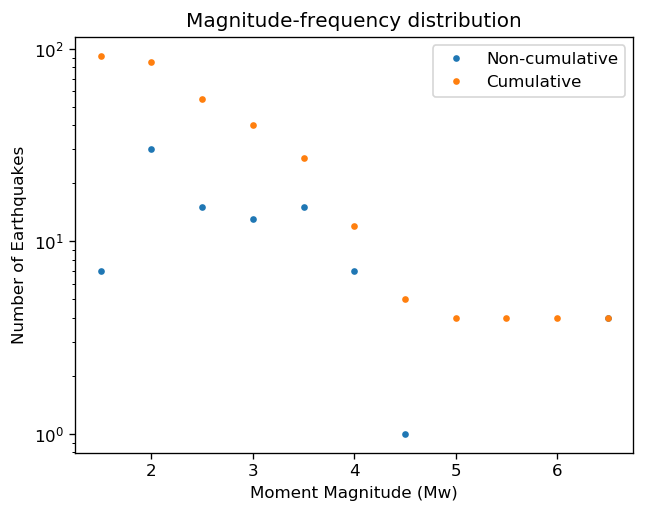

In [263]:
# MFD plot
include("scripts/earthquake-cycles.jl")

Mw = moment_magnitude(P, S, O.Slip, O.SlipVel, O.time_)

MwPlot(Mw)

<h3> Rough Work

In [257]:
delfafter, tStart, tEnd, vhypo, hypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

In [234]:
tStart

169-element Array{Float64,1}:
  6.596547481077886    
  6.933020882163501    
  7.0526558692161645   
  7.097518989360913    
  7.13490492281487     
  7.179768042959619    
  7.217153976413576    
  7.239585536485951    
  7.262017096558325    
  7.299403030012282    
  7.321834590084657    
  7.344266150157031    
 18.432934012601986    
  ⋮                    
  1.251122090693002e10 
  1.251122093383157e10 
  1.2511220940583126e10
  1.251122094064294e10 
  1.2511220940725185e10
  1.251122094080743e10 
  1.2511220940979397e10
  1.2511221150759384e10
  1.251122122983019e10 
  1.2511221278137838e10
  1.2511221284560415e10
  1.25112213195743e10  

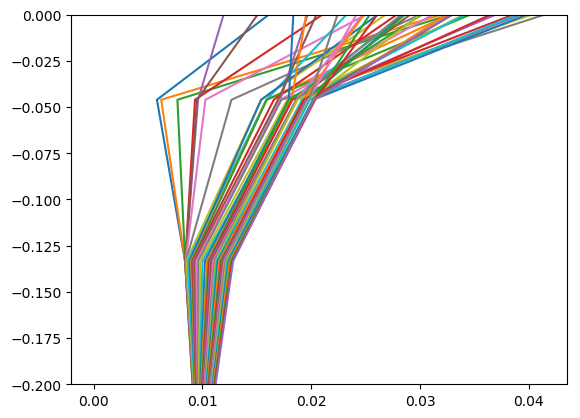

In [288]:
# 39 to 83: one event
PyPlot.plot(O.Slip[:,39:83], S.FltX./1e3)
ylim([-0.2, 0])
show()

721-element Array{Float64,1}:
 -48000.0              
 -47953.95382276106    
 -47866.666666666664   
 -47779.37951057227    
 -47733.333333333336   
 -47687.2871560944     
 -47600.0              
 -47512.7128439056     
 -47466.666666666664   
 -47420.62048942773    
 -47333.333333333336   
 -47246.04617723894    
 -47200.0              
      ⋮                
   -753.953822761061   
   -666.6666666666642  
   -579.3795105722675  
   -533.3333333333285  
   -487.2871560943895  
   -399.9999999999927  
   -312.71284390559595 
   -266.66666666666424 
   -220.62048942772526 
   -133.33333333332848 
    -46.046177238931705
      0.0              

In [255]:
721-5

716

In [260]:
hist = fit(Histogram, hypo./1e3, nbins = 20)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -12.0:1.0:0.0
weights: [1, 0, 0, 1, 20, 19, 12, 4, 6, 0, 0, 29]
closed: left
isdensity: false

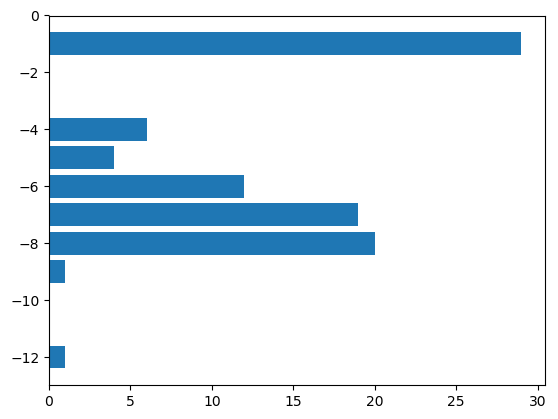

In [261]:
fig = PyPlot.figure()
ax = fig[:add_subplot](111)
ax[:barh](hist.edges[1][1:end-1], hist.weights)
show()

In [264]:
hist.weights

12-element Array{Int64,1}:
  1
  0
  0
  1
 20
 19
 12
  4
  6
  0
  0
 29

In [266]:
hypo

92-element Array{Float64,1}:
 -7866.666666666664  
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -487.2871560943895 
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
  -312.71284390559595
     ⋮               
 -6446.046177238932  
 -6353.953822761061  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6712.712843905596  
 -6266.666666666664  
 -6179.3795105722675 
 -6087.2871560943895 
 -6446.046177238932  
 -7333.3333333333285 